In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


dataset_dir = r"C:\Users\HP\Downloads\leafdata"


train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  #
)


train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(256, 256),  
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [4]:
from tensorflow.keras.applications import VGG16
import numpy as np


vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


def extract_features(generator, model):
    features = []
    labels = []
    for batch_images, batch_labels in generator:
        batch_features = model.predict(batch_images)
        features.append(batch_features)
        labels.append(batch_labels)
        if len(features) >= generator.samples // generator.batch_size:
            break
    return np.vstack(features), np.vstack(labels)


train_features, train_labels = extract_features(train_generator, vgg16_base)
val_features, val_labels = extract_features(validation_generator, vgg16_base)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


lenet_model = Sequential([
    Flatten(input_shape=train_features.shape[1:]),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])


lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = lenet_model.fit(
    train_features, train_labels,
    validation_data=(val_features, val_labels),
    epochs=40,
    batch_size=32
)


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5413 - loss: 1.8682 - val_accuracy: 0.8269 - val_loss: 0.4676
Epoch 2/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8070 - loss: 0.4980 - val_accuracy: 0.8341 - val_loss: 0.3982
Epoch 3/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8644 - loss: 0.3721 - val_accuracy: 0.8606 - val_loss: 0.3622
Epoch 4/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8459 - loss: 0.3931 - val_accuracy: 0.8389 - val_loss: 0.3894
Epoch 5/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8637 - loss: 0.3445 - val_accuracy: 0.8317 - val_loss: 0.3967
Epoch 6/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8863 - loss: 0.2915 - val_accuracy: 0.8606 - val_loss: 0.3244
Epoch 7/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8766 - loss: 0.2794 - val_accuracy: 0.8678 - val_loss: 0.3039
Epoch 8/40
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9169 - loss: 0.2044 - val_accuracy: 0.8798 - v

In [6]:
# Create a test generator
test_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)


test_features, test_labels = extract_features(test_generator, vgg16_base)


test_loss, test_accuracy = lenet_model.evaluate(test_features, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 430 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9210 - loss: 0.3132
Test Accuracy: 92.55%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


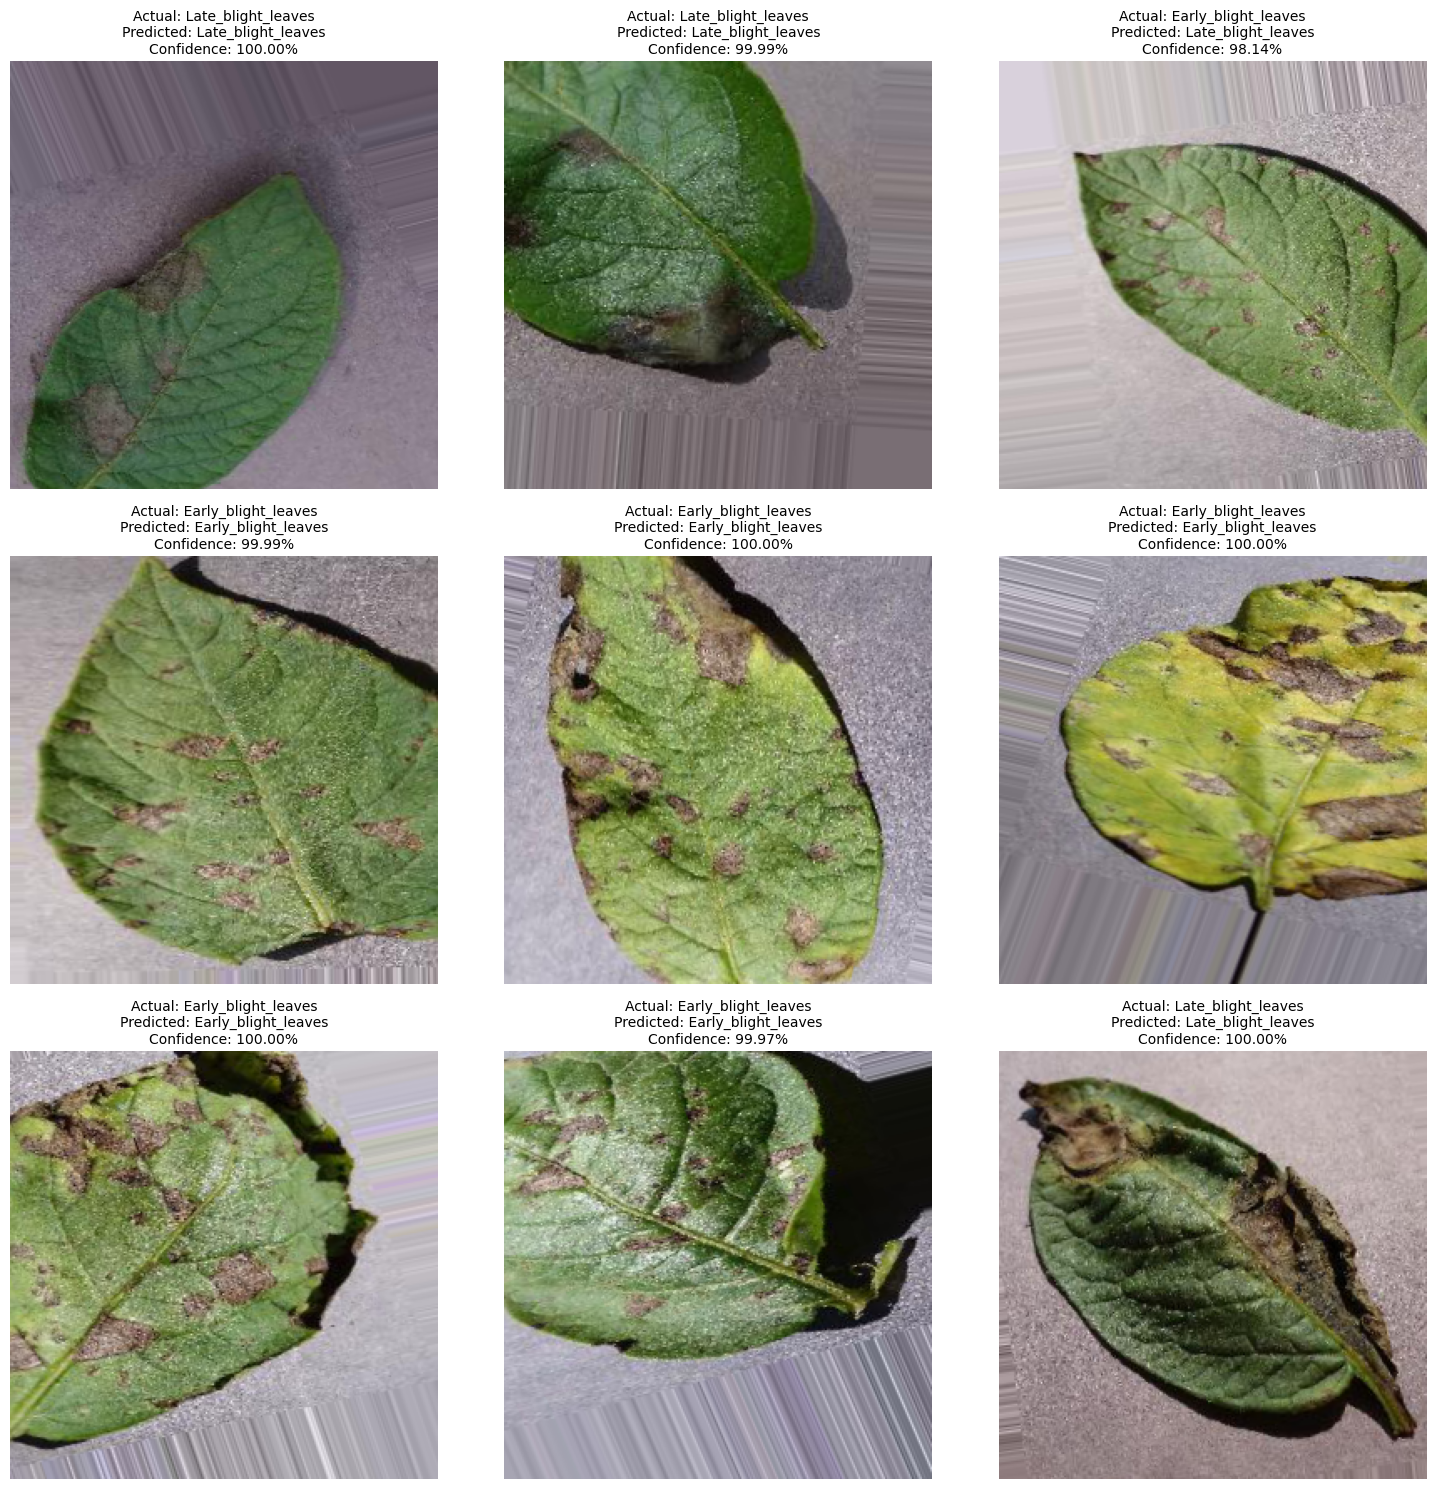

In [83]:
import matplotlib.pyplot as plt
import numpy as np


def predict(model, image):
    
    image_batch = np.expand_dims(image, axis=0)
    
   
    features = vgg16_base.predict(image_batch)
    
    
    prediction = model.predict(features)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    
    return predicted_class, confidence


plt.figure(figsize=(15, 15))


test_images, test_labels = next(test_generator)

for i in range(9):  # Show 9 images
    ax = plt.subplot(3, 3, i + 1)
    
    
    image = test_images[i]
    actual_class = np.argmax(test_labels[i])
    
   
    predicted_class, confidence = predict(lenet_model, image)
    
    
    actual_class_name = test_generator.class_indices
    class_names = {v: k for k, v in actual_class_name.items()}  # Reverse the dictionary
    actual_class_name = class_names[actual_class]
    predicted_class_name = class_names[predicted_class]
    
    
    image_to_display = (image * 255).astype("uint8")
    
    
    plt.imshow(image_to_display)
    plt.title(
        f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}\nConfidence: {confidence:.2f}%", 
        fontsize=10
    )
    plt.axis("off")

plt.tight_layout()
plt.savefig(r"C:\Users\HP\Downloads\predictions_visualization2_VGG.png")
plt.show()



In [8]:
# # VGG16 is a deep CNN model proposed by Visual Geometry Group (VGG).
# # It consists of 16 layers with small 3x3 convolution filters.
# # Pretrained on ImageNet, it excels at feature extraction.

# # What is LeNet?
# # LeNet-5 is one of the first CNN architectures, proposed by Yann LeCun.
# # Designed for digit recognition (MNIST).
# # Consists of convolutional and fully connected layers.
# # Works well on simple classification tasks.

# # ImageNet is a large-scale visual database designed for use in visual object recognition research. It contains millions of labeled images across thousands of categories, making it one of the most widely used datasets for training deep learning models in computer vision.

# # Key Facts About ImageNet:
# # Created by: Fei-Fei Li and her team at Princeton and Stanford in 2009.
# # Size: Over 14 million images across 22,000 categories (as of now).
# # Categories: Objects such as animals, vehicles, food items, household objects, etc.
# # Annotation: Each image is labeled with one or more categories using crowdsourcing (via Amazon Mechanical Turk).
# # Purpose: Used to train and benchmark deep learning models for tasks like image classification, object detection, and segmentation.

# # How is ImageNet Used?
# # Pretrained models (e.g., VGG16, ResNet, Inception) are used as feature extractors for various tasks.
# # Researchers use ImageNet to fine-tune models for specific applications like medical imaging, autonomous vehicles, and more.

# In your code:

# ```python
# vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
# ```

# The **ImageNet dataset** is being used in the following ways:

# ---

# ### **1. Pretrained Weights (Size & Categories)**
# - When you specify `weights='imagenet'`, it means you're loading a VGG16 model that has been **pretrained on the entire ImageNet dataset**, which consists of **14 million images** across **22,000 categories**.
# - This means the model has already learned useful **low-level features** (edges, textures) and **high-level patterns** (shapes, object parts) from a wide variety of objects such as animals, vehicles, food, and more.
# - These learned features are useful even if your new dataset (leaf disease classification) is different from the original categories of ImageNet.

# **How it applies to your code:**  
# Instead of training from scratch, the model leverages knowledge gained from ImageNet's large dataset and adapts it to your problem through transfer learning.

# ---

# ### **2. Feature Extraction (Purpose of ImageNet)**
# - The argument `include_top=False` means that you're **removing the fully connected (FC) layers** at the top of the VGG16 model.
# - Without the top layers, the model acts as a **feature extractor**, meaning it will take your leaf images and extract meaningful feature maps based on what it learned from ImageNet.
# - These feature maps are then passed to your custom classifier (LeNet in your case).

# **How it applies to your code:**  
# Your model will extract useful features such as leaf texture, shape, and color patterns based on its general knowledge from ImageNet (even though it was trained on different objects).

# ---

# ### **3. Transfer Learning (Annotation)**
# - ImageNet images were annotated using crowdsourcing, which provided high-quality labeled data across multiple categories.
# - The pretrained VGG16 model learned from these annotations, meaning it understands how to distinguish between different objects based on millions of labeled examples.
# - Even though your leaf disease dataset has different labels, the underlying knowledge (e.g., edge detection, pattern recognition) transfers well.

# **How it applies to your code:**  
# You're leveraging the **annotated knowledge** from ImageNet without needing to label such a large dataset yourself.

# ---

# ### **4. Faster and More Accurate Model Training**
# - Training a deep model like VGG16 from scratch on a small dataset (e.g., 2000 images in your case) is impractical. 
# - Since VGG16 has already been trained on a vast dataset, it provides a strong starting point, reducing the need for extensive training and improving accuracy.
# - Instead of starting from random weights, you're starting with pretrained weights, leading to faster convergence and better generalization.

# **How it applies to your code:**  
# By using pretrained ImageNet weights, your model achieves high accuracy faster compared to training from scratch with limited data.

# ---

# ### **In Summary:**
# By using `weights='imagenet'` in your code, you are taking advantage of:

# 1. **Size:** Leveraging the 14M+ images and their diverse features to improve your model.
# 2. **Categories:** Using knowledge learned from 22,000 object categories to help recognize patterns in leaf diseases.
# 3. **Annotations:** Benefiting from high-quality labeled data that helped VGG16 generalize well to new data.
# 4. **Purpose:** Utilizing ImageNet for transfer learning and feature extraction to train your model efficiently.






In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


pred_probs = lenet_model.predict(test_features)
pred_classes = np.argmax(pred_probs, axis=1)


true_classes = np.argmax(test_labels, axis=1)  # Convert the true one-hot labels to class labels

min_length = min(len(true_classes), len(pred_classes))
true_classes = true_classes[:min_length]
pred_classes = pred_classes[:min_length]

print(f"Adjusted True classes shape: {true_classes.shape}")
print(f"Adjusted Predicted classes shape: {pred_classes.shape}")

accuracy = accuracy_score(true_classes, pred_classes)
precision = precision_score(true_classes, pred_classes, average='weighted', zero_division=0)
recall = recall_score(true_classes, pred_classes, average='weighted')
f1 = f1_score(true_classes, pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')




13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Adjusted True classes shape: (14,)
Adjusted Predicted classes shape: (14,)
Accuracy: 0.50
Precision: 0.49
Recall: 0.50
F1-score: 0.48


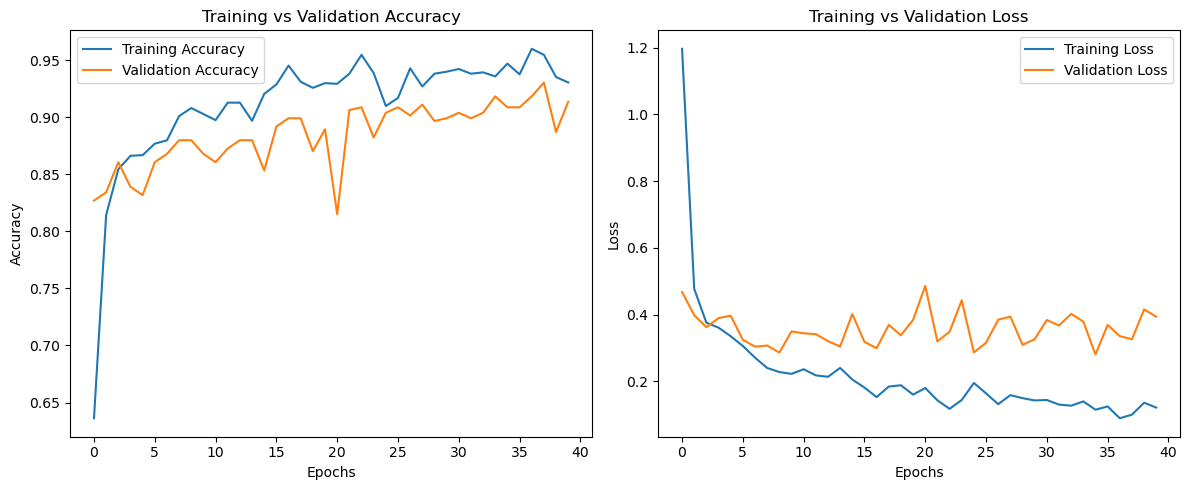

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.savefig(r"C:\Users\HP\Downloads\predictions_visualization_Graph.png")
plt.show()


In [2]:
data = {
    "Parameter": ["Input Size", "Hidden Size", "Number of Layers", "Number of Classes", "Output Size", "Learning Rate", "Balance Factor", "Model Size", "Optimizer Used", "Loss Function Used", "Activation Function Used", "Why ImageNet Used", "How Preprocessing Done", "Library Used" , "Test Accuracy:" , ""],
    "Value": [(256, 256, 3), 128, 4, 3, 3, 0.001, "N/A", "Small", "Adam", "Categorical Crossentropy", "ReLU/Softmax", "Pretrained weights and feature extraction", "Rescaling, Augmentation", "TensorFlow, Keras, OpenCV, Sklearn","93%", ]
}

summary_df = pd.DataFrame(data)
print(summary_df.to_markdown())

NameError: name 'pd' is not defined

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\HP/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [00:59<00:00, 9.24MB/s] 


In [10]:
pip install torchvision


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.6 MB 653.6 kB/s eta 0:00:03
   -------- ------------------------------- 0.3/1.6 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 12.4 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 11.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
